In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
!pip list

Package                 Version
----------------------- -----------
asttokens               3.0.0
colorama                0.4.6
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.17
decorator               5.2.1
executing               2.2.1
fonttools               4.60.1
ipykernel               7.1.0
ipython                 9.6.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.9.1
kiwisolver              1.4.9
matplotlib              3.10.7
matplotlib-inline       0.2.1
nest-asyncio            1.6.0
numpy                   2.3.4
packaging               25.0
pandas                  2.3.3
parso                   0.8.5
pillow                  12.0.0
pip                     24.3.1
platformdirs            4.5.0
prompt_toolkit          3.0.52
psutil                  7.1.2
pure_eval               0.2.3
Pygments                2.19.2
pyparsing               

In [ ]:
# df = pd.read_excel('dataset.xlsx')
df = pd.read_csv('dataset.csv')
df.head(15)

,word_id,sentence_id,word,label,is_ne,is_spelling_correct
0,45,1,Gusto,FIL,NaN,True
1,46,1,kong,FIL,NaN,True
2,47,1,intindihin,FIL,NaN,True
3,48,1,pero,FIL,NaN,True
4,49,1,hindi,FIL,NaN,True


In [10]:
len(df["is_ne"].isnull())

23150


Value counts:
label
FIL    17949
OTH     3281
ENG     1920
Name: count, dtype: int64

Percentage distribution:
label
FIL    77.533477
OTH    14.172786
ENG     8.293737
Name: proportion, dtype: float64


C:\Users\Kaizen\AppData\Local\Temp\ipykernel_45884\3759091519.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


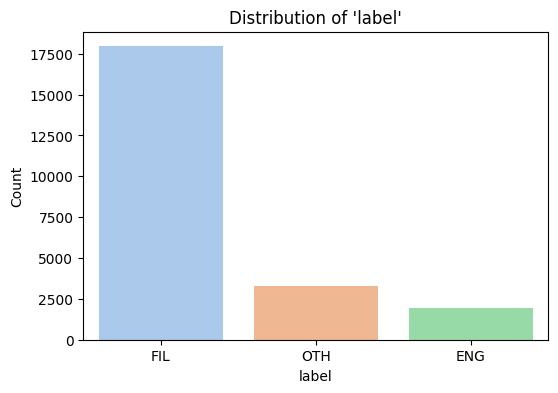

In [11]:
column = "label"

print("\nValue counts:")
print(df[column].value_counts())

print("\nPercentage distribution:")
print(df[column].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=column, palette="pastel")
plt.title(f"Distribution of '{column}'")
plt.xlabel(column)
plt.ylabel("Count")
plt.show()

In [12]:
df['label'] = df['label'].replace(['NUM', 'SYM'], 'OTH')


Value counts:
label
FIL    17949
OTH     3281
ENG     1920
Name: count, dtype: int64

Percentage distribution:
label
FIL    77.533477
OTH    14.172786
ENG     8.293737
Name: proportion, dtype: float64


C:\Users\Kaizen\AppData\Local\Temp\ipykernel_45884\3759091519.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


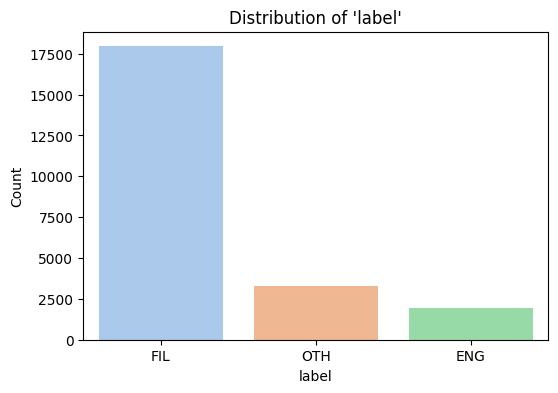

In [13]:
column = "label"

print("\nValue counts:")
print(df[column].value_counts())

print("\nPercentage distribution:")
print(df[column].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=column, palette="pastel")
plt.title(f"Distribution of '{column}'")
plt.xlabel(column)
plt.ylabel("Count")
plt.show()

In [14]:
df_unk= df[df['label'] == 'UNK']

df_unk.head()

,word_id,sentence_id,word,label,is_ne,is_spelling_correct


In [15]:
## feature for vowel and consonant ratio

def vowel_consonant_ratio(word):
    if not isinstance(word, str):  ### if the word does not have alphabet
        return 0.0
    
    vowels = ['a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U']
    num_vowels = sum(1 for ch in word if ch.isalpha() and ch in vowels)
    num_consonants = sum(1 for ch in word)

    if num_consonants == 0:
        return 1.0 if num_vowels > 0 else 0.0
    return num_vowels / num_consonants

def vowel_word_ratio(word):
    if not isinstance(word, str):
        return 0.0
    
    vowels = ['a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U']
    num_vowels = sum(1 for ch in word if ch.isalpha() and ch in vowels)
    num_consonants = sum(1 for ch in word)

    if num_consonants == 0:
        return 1.0 if num_vowels > 0 else 0.0
    return num_vowels / num_consonants

df['vowel_word_ratio'] = df['word'].apply(vowel_word_ratio)

df.head()

,word_id,sentence_id,word,label,is_ne,is_spelling_correct,vowel_word_ratio
0,45,1,Gusto,FIL,NaN,True,0.40
1,46,1,kong,FIL,NaN,True,0.25
2,47,1,intindihin,FIL,NaN,True,0.40
3,48,1,pero,FIL,NaN,True,0.50
4,49,1,hindi,FIL,NaN,True,0.40


In [16]:
## Word length

df['word_length'] = df['word'].apply(lambda w: len(str(w)) if isinstance(w, str) else 0)

In [17]:
import re
from sklearn.feature_extraction.text import CountVectorizer

def clean_word(word):
    if not isinstance(word, str):
        return "" 
    return re.sub(r'[^a-z]', '', word.lower())

df['clean_word'] = df['word'].apply(clean_word)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
X = vectorizer.fit_transform(df['clean_word'])
ngrams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_ngrams = pd.concat([df, ngrams_df], axis=1)

print(df_ngrams.head())


ModuleNotFoundError: No module named 'sklearn'

Categorical Features
    -

Handling imbalance
    - Check functions below

Understand the ML models
    - Measure Accuracy, Precision, Recall. F1-score/Harmonic,
      - Review lectures/slides
      - Decide which of these three we give emphasis, there will be tradeoffs
        - F1-score is a metric of the balance between precision and recall.

Look at these functions, focus theoretically
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
